# Analyzing Criminal Incident Data in Seattle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

In [10]:
seattle = pd.read_csv('seattle_incidents_summer_2014.csv',
                    parse_dates=['Date Reported', 'Occurred Date or Date Range Start','Occurred Date Range End'],
                    infer_datetime_format=True)
seattle.head()

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,2015-06-28 10:31:00,2014-06-28 10:31:00,2015-06-28 10:31:00,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,2015-06-24 11:09:00,2014-06-01 00:00:00,2015-06-24 11:09:00,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,2015-06-22 09:22:00,2014-08-31 09:00:00,NaT,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,2015-06-21 15:52:00,2014-06-20 13:38:00,NaT,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,2015-06-20 11:59:00,2014-06-01 11:59:00,2014-11-01 12:00:00,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014


In [49]:
by_type = seattle.pivot_table('RMS CDW ID', aggfunc='count',
                            index='Summarized Offense Description')
by_type.head()

Summarized Offense Description
ANIMAL COMPLAINT      96
ASSAULT             2018
BIAS INCIDENT         20
BIKE THEFT           797
BURGLARY            3212
Name: RMS CDW ID, dtype: int64

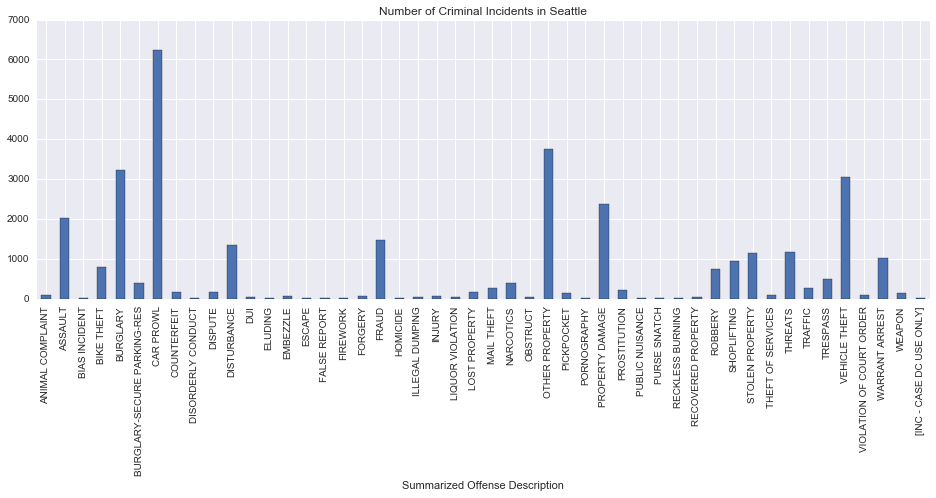

In [50]:
fig, ax = plt.subplots(figsize = (16, 5))
by_type.plot(ax=ax,kind='bar',title='Number of Criminal Incidents in Seattle Summer')

Month                                6       7       8
Summarized Offense Description                        
ASSAULT                          659.0   661.0   698.0
BURGLARY                        1020.0  1153.0  1039.0
CAR PROWL                       2196.0  1975.0  2059.0
DISTURBANCE                      413.0   449.0   471.0
FRAUD                            499.0   507.0   467.0
OTHER PROPERTY                  1237.0  1299.0  1219.0
PROPERTY DAMAGE                  743.0   870.0   752.0
ROBBERY                          247.0   231.0   258.0
SHOPLIFTING                      368.0   276.0   300.0
STOLEN PROPERTY                  351.0   417.0   368.0
THREATS                          407.0   378.0   393.0
VEHICLE THEFT                   1216.0  1110.0   731.0
WARRANT ARREST                   349.0   351.0   321.0


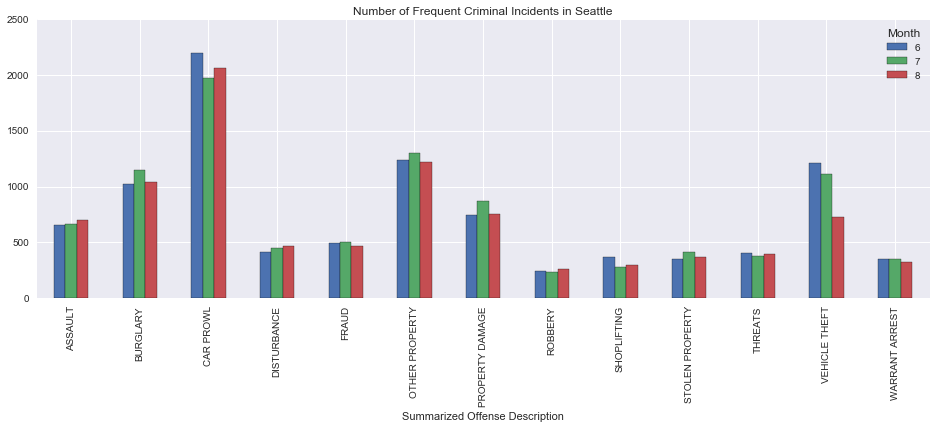

In [51]:
by_type = seattle.pivot_table('RMS CDW ID', aggfunc='count',
                            index='Summarized Offense Description', columns = 'Month')
by_type_frequent = by_type[by_type>200].dropna(how='any')
print(by_type_frequent)
fig, ax = plt.subplots(figsize = (16, 5))
by_type_frequent.plot(ax=ax,kind='bar',title='Number of Frequent Criminal Incidents in Seattle Summer');

In [20]:
# Find the start date
ind = pd.DatetimeIndex(seattle['Occurred Date or Date Range Start'])
print(ind[0:3])
seattle['date'] = ind.date.astype('datetime64')
seattle['hour'] = ind.hour
seattle.head()

DatetimeIndex(['2014-06-28 10:31:00', '2014-06-01 00:00:00',
               '2014-08-31 09:00:00'],
              dtype='datetime64[ns]', freq=None)


,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,...,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year,date,hour
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,2015-06-28 10:31:00,2014-06-28 10:31:00,2015-06-28 10:31:00,...,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014,2014-06-28,10
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,2015-06-24 11:09:00,2014-06-01 00:00:00,2015-06-24 11:09:00,...,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014,2014-06-01,0
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,2015-06-22 09:22:00,2014-08-31 09:00:00,NaT,...,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014,2014-08-31,9
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,2015-06-21 15:52:00,2014-06-20 13:38:00,NaT,...,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014,2014-06-20,13
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,2015-06-20 11:59:00,2014-06-01 11:59:00,2014-11-01 12:00:00,...,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014,2014-06-01,11


In [56]:
by_hour = seattle.pivot_table('RMS CDW ID', aggfunc='count',
                            index='hour',
                            columns='Summarized Offense Description').fillna(0)
by_hour.head()

Summarized Offense Description,ANIMAL COMPLAINT,ASSAULT,BIAS INCIDENT,BIKE THEFT,BURGLARY,BURGLARY-SECURE PARKING-RES,CAR PROWL,COUNTERFEIT,DISORDERLY CONDUCT,DISPUTE,...,STOLEN PROPERTY,THEFT OF SERVICES,THREATS,TRAFFIC,TRESPASS,VEHICLE THEFT,VIOLATION OF COURT ORDER,WARRANT ARREST,WEAPON,[INC - CASE DC USE ONLY]
hour,,,,,,,,,,,,,,,,,,,,,
0,9.0,95.0,2.0,44.0,211.0,45.0,394.0,5.0,0.0,11.0,...,38.0,6.0,50.0,3.0,28.0,187.0,2.0,36.0,6.0,1.0
1,2.0,114.0,0.0,12.0,61.0,6.0,231.0,5.0,0.0,3.0,...,10.0,0.0,23.0,0.0,23.0,78.0,2.0,17.0,10.0,0.0
2,0.0,124.0,0.0,6.0,62.0,13.0,176.0,0.0,0.0,2.0,...,16.0,15.0,22.0,4.0,6.0,59.0,0.0,14.0,6.0,0.0
3,3.0,31.0,0.0,8.0,96.0,17.0,96.0,0.0,0.0,2.0,...,13.0,0.0,12.0,2.0,13.0,45.0,0.0,9.0,3.0,0.0
4,0.0,32.0,0.0,10.0,63.0,8.0,84.0,0.0,0.0,0.0,...,24.0,8.0,12.0,5.0,17.0,22.0,1.0,5.0,0.0,0.0


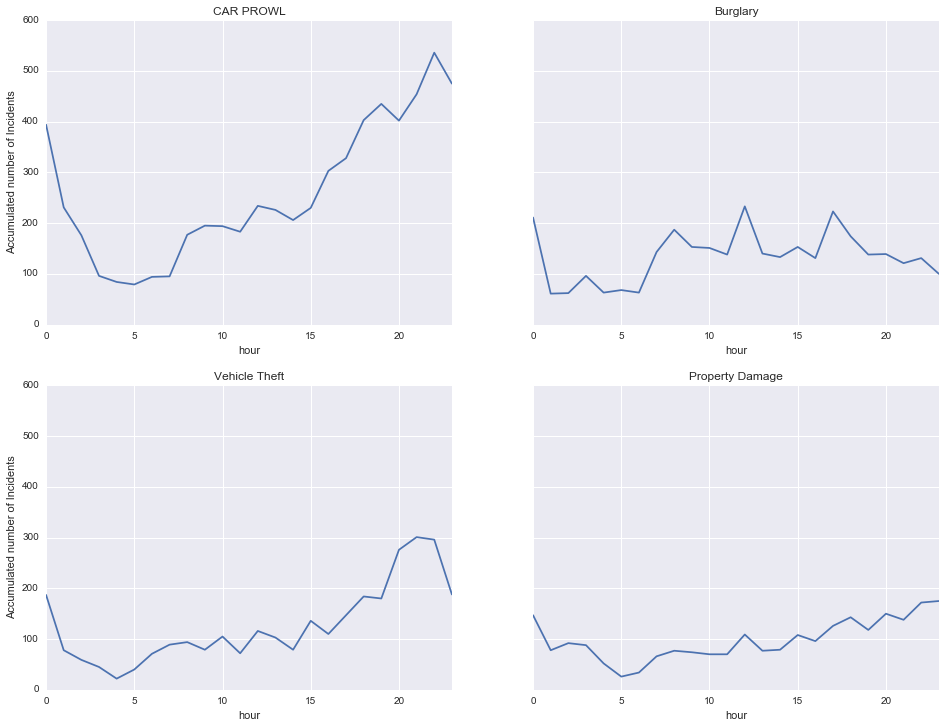

In [85]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12), sharey=True)
by_hour.loc[:,'CAR PROWL'].plot(ax=ax[0,0],title='CAR PROWL')
by_hour.loc[:,'BURGLARY'].plot(ax=ax[0,1],title='Burglary')
by_hour.loc[:,'VEHICLE THEFT'].plot(ax=ax[1,0],title='Vehicle Theft')
by_hour.loc[:,'PROPERTY DAMAGE'].plot(ax=ax[1,1],title='Property Damage')
ax[0,0].set_ylabel('Accumulated number of Incidents')
ax[1,0].set_ylabel('Accumulated number of Incidents')

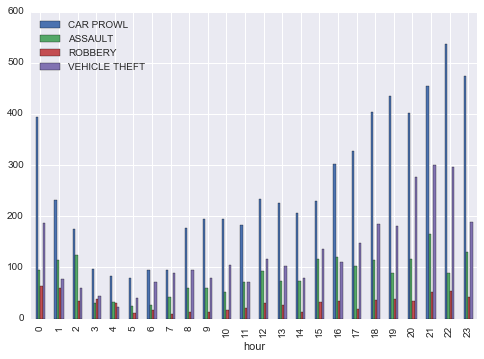

In [103]:
by_hour.columns.name = None
ax = by_hour.loc[:,('CAR PROWL','ASSAULT','ROBBERY','VEHICLE THEFT')].plot(kind='bar')
#ax.set_xlim(,23.5)

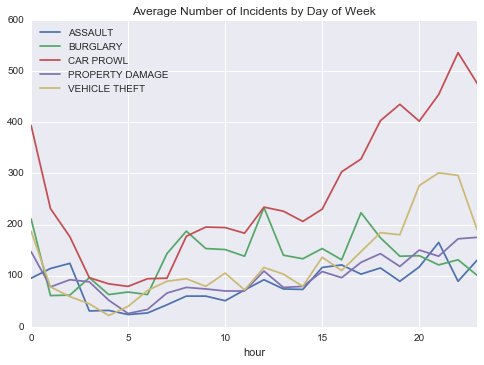

In [112]:
by_hour_fre = by_hour[by_hour > 20].dropna(axis = 1, how='any')
del by_hour_fre['DISTURBANCE']
del by_hour_fre['OTHER PROPERTY']
by_hour_fre.plot(title='Average Number of Incidents by Day of Week')

In [53]:
by_date = seattle.pivot_table('RMS CDW ID', aggfunc='count',
                            index='date',
                            columns='Summarized Offense Description').fillna(0)
by_date.head()

Summarized Offense Description,ANIMAL COMPLAINT,ASSAULT,BIAS INCIDENT,BIKE THEFT,BURGLARY,BURGLARY-SECURE PARKING-RES,CAR PROWL,COUNTERFEIT,DISORDERLY CONDUCT,DISPUTE,...,STOLEN PROPERTY,THEFT OF SERVICES,THREATS,TRAFFIC,TRESPASS,VEHICLE THEFT,VIOLATION OF COURT ORDER,WARRANT ARREST,WEAPON,[INC - CASE DC USE ONLY]
date,,,,,,,,,,,,,,,,,,,,,
2014-06-01,4.0,24.0,2.0,4.0,54.0,7.0,86.0,2.0,0.0,2.0,...,10.0,2.0,27.0,2.0,0.0,37.0,2.0,6.0,0.0,1.0
2014-06-02,4.0,17.0,0.0,12.0,35.0,10.0,79.0,4.0,0.0,2.0,...,8.0,1.0,16.0,5.0,10.0,25.0,0.0,24.0,2.0,0.0
2014-06-03,0.0,21.0,0.0,10.0,40.0,4.0,63.0,2.0,0.0,2.0,...,4.0,2.0,8.0,2.0,8.0,36.0,2.0,9.0,4.0,0.0
2014-06-04,2.0,30.0,0.0,6.0,55.0,2.0,70.0,3.0,0.0,4.0,...,8.0,2.0,16.0,6.0,8.0,36.0,4.0,15.0,0.0,0.0
2014-06-05,0.0,19.0,0.0,6.0,36.0,2.0,80.0,2.0,0.0,1.0,...,12.0,0.0,22.0,3.0,6.0,36.0,0.0,20.0,2.0,0.0


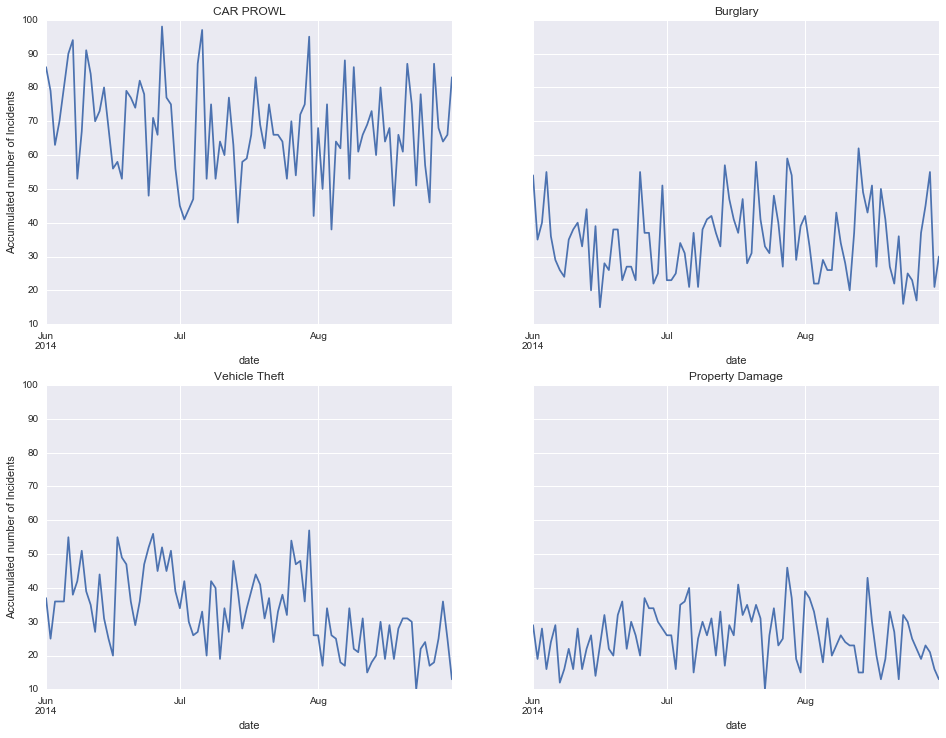

In [86]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12), sharey=True)
by_date.loc[:,'CAR PROWL'].plot(ax=ax[0,0],title='CAR PROWL')
by_date.loc[:,'BURGLARY'].plot(ax=ax[0,1],title='Burglary')
by_date.loc[:,'VEHICLE THEFT'].plot(ax=ax[1,0],title='Vehicle Theft')
by_date.loc[:,'PROPERTY DAMAGE'].plot(ax=ax[1,1],title='Property Damage')
ax[0,0].set_ylabel('Accumulated number of Incidents')
ax[1,0].set_ylabel('Accumulated number of Incidents')

In [61]:
by_weekday = by_date.groupby(by_date.index.dayofweek).mean()
by_weekday.head()

Summarized Offense Description,ANIMAL COMPLAINT,ASSAULT,BIAS INCIDENT,BIKE THEFT,BURGLARY,BURGLARY-SECURE PARKING-RES,CAR PROWL,COUNTERFEIT,DISORDERLY CONDUCT,DISPUTE,...,STOLEN PROPERTY,THEFT OF SERVICES,THREATS,TRAFFIC,TRESPASS,VEHICLE THEFT,VIOLATION OF COURT ORDER,WARRANT ARREST,WEAPON,[INC - CASE DC USE ONLY]
0,1.461538,19.538462,0.000000,11.000000,37.615385,4.153846,60.153846,2.923077,0.153846,1.538462,...,11.076923,0.923077,12.692308,3.307692,4.923077,32.769231,0.384615,11.692308,1.461538,0.000000
1,1.076923,17.307692,0.461538,8.461538,33.769231,3.615385,63.384615,1.384615,0.000000,2.384615,...,13.153846,1.153846,13.153846,3.846154,5.846154,33.153846,1.076923,12.538462,1.923077,0.000000
2,0.769231,23.615385,0.307692,9.307692,37.846154,4.076923,67.307692,1.923077,0.000000,1.769231,...,12.000000,1.307692,12.153846,3.769231,4.461538,35.923077,1.000000,12.153846,1.076923,0.153846
3,0.615385,21.000000,0.153846,7.615385,35.307692,5.307692,67.538462,1.076923,0.000000,1.076923,...,12.307692,0.923077,14.461538,2.153846,5.000000,30.769231,1.846154,13.384615,2.230769,0.000000
4,1.461538,19.461538,0.153846,9.307692,41.384615,4.461538,70.846154,1.923077,0.000000,2.461538,...,11.923077,1.461538,13.461538,1.923077,7.153846,36.846154,1.307692,10.923077,1.384615,0.000000


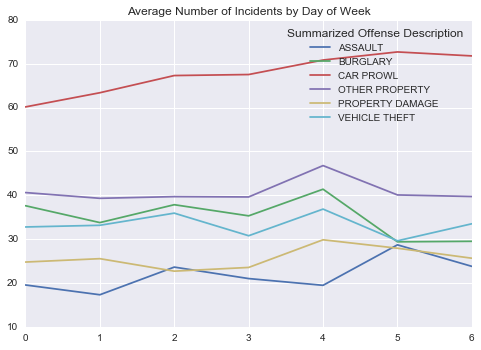

In [102]:
by_weekday_fre = by_weekday[by_weekday > 15].dropna(axis = 1, how='any')
by_weekday_fre.plot(title='Average Number of Incidents by Day of Week')

In [73]:
totalby_date = seattle.pivot_table('RMS CDW ID', aggfunc='count',
                            index='date')
totalby_date.head()

date
2014-06-01    397
2014-06-02    419
2014-06-03    357
2014-06-04    392
2014-06-05    386
Name: RMS CDW ID, dtype: int64

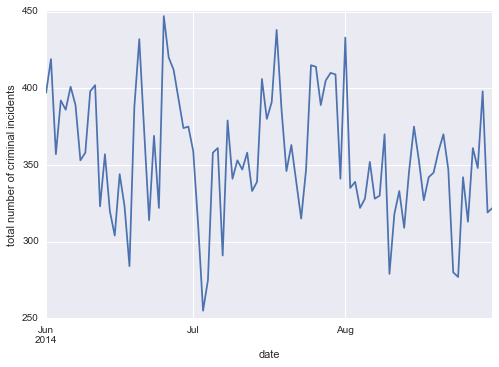

In [83]:
ax=totalby_date.plot()
ax.set_ylabel('total number of criminal incidents')
#ax.set_xlim('2014-06-21','2014-07-18')

In [97]:
totalby_hour = seattle.pivot_table('RMS CDW ID', aggfunc='count',
                            index='hour')
totalby_hour.head()

hour
0    2073
1     989
2     827
3     589
4     475
Name: RMS CDW ID, dtype: int64

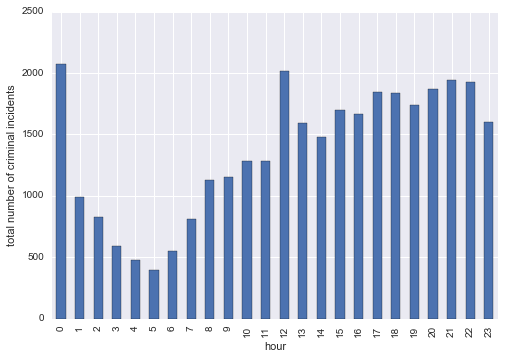

In [100]:
ax=totalby_hour.plot(kind='bar')
ax.set_ylabel('total number of criminal incidents')